In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf ## sus ##  --only for loading data
import psutil
import pickle
import os



In [5]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"x_train shape: {x_train.shape}")  
print(f"x_test shape: {x_test.shape}")    

x_trin = np.array(x_train)
x_tst = np.array(x_test)
x_trin = x_trin.astype('float64')    
x_tst = x_tst.astype('float64') 

print(f"x_train is of type {type(x_trin)} and shape {x_trin.shape}")
print(f"x_test is of type {type(x_tst)} and shape {x_tst.shape}")


x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
x_train is of type <class 'numpy.ndarray'> and shape (60000, 28, 28)
x_test is of type <class 'numpy.ndarray'> and shape (10000, 28, 28)


In [6]:
x_trin = np.expand_dims(x_trin, axis=-1)
x_tst = np.expand_dims(x_tst, axis=-1)

x_train=x_trin
x_test=x_tst

In [7]:
x_test.shape


(10000, 28, 28, 1)

In [8]:
def batch_norm(x, scale, shift, eps=1e-5):  

    mean = np.mean(x, axis=(0, 1, 2))  
    variance = np.mean((x - mean)**2, axis=(0, 1, 2)) 
    

    xmu = x - mean  
    ivar = 1 / np.sqrt(variance + eps) 
    norm = xmu * ivar  
    
    newX = norm * scale + shift  

    cache = (norm, xmu, ivar, variance, eps)
    return newX, cache

def batch_norm_backward(dout, cache, scale):
    norm, xmu, ivar, variance, eps = cache
    N, H, W, C = dout.shape

    dsc = np.sum(dout * norm, axis=(0, 1, 2))  
    dsh = np.sum(dout, axis=(0, 1, 2))  
    dxhat = dout * scale  

    dvar = np.sum(dxhat * xmu * (-0.5) * (ivar**3), axis=(0, 1, 2))  

    dmu = np.sum(dxhat * (-ivar), axis=(0, 1, 2)) + dvar * (-2 / (N*H*W)) * np.sum(xmu, axis=(0, 1, 2)) 

    dx = (dxhat * ivar) + (dvar * 2 * xmu / (N*H*W)) + (dmu / (N*H*W)) 

    return dx, dsc, dsh
    

In [9]:
x=np.random.randn(100,32,32,64)*100
sc=np.ones(64)
shift=np.zeros(64)
new=batch_norm(x,sc,shift)


In [10]:
def para():
    


   
    Wcn1 = np.random.randn(16, 3, 3, 1) * np.sqrt(2.0 / (3 * 3 * 3))
    bcn1 = np.zeros((1, 1, 1, 16))
    Sc1  = np.ones((1, 1, 1, 16))  
    Sh1  = np.zeros((1, 1, 1, 16)) 

 
    Wcn2 = np.random.randn(32, 3, 3, 16) * np.sqrt(2.0 / (3 * 3 * 32))
    bcn2 = np.zeros((1, 1, 1, 32))
    Sc2  = np.ones((1, 1, 1, 32))
    Sh2  = np.zeros((1, 1, 1, 32))

    
    Wcn3 = np.random.randn(64, 3, 3, 32) * np.sqrt(2.0 / (3 * 3 * 32))
    bcn3 = np.zeros((1, 1, 1, 64))
    Sc3  = np.ones((1, 1, 1, 64))
    Sh3  = np.zeros((1, 1, 1, 64))

   
    Wcn4 = np.random.randn(64, 3, 3, 64) * np.sqrt(2.0 / (3 * 3 * 64))
    bcn4 = np.zeros((1, 1, 1, 64))
    Sc4  = np.ones((1, 1, 1, 64))
    Sh4  = np.zeros((1, 1, 1, 64))

    Wcn5 = np.random.randn(128, 3, 3, 64) * np.sqrt(2.0 / (3 * 3 * 64))
    bcn5 = np.zeros((1, 1, 1, 128))
    Sc5  = np.ones((1, 1, 1, 128))
    Sh5  = np.zeros((1, 1, 1, 128))


    W1 = np.random.randn(1028, 512) * np.sqrt(2.0 / 1152)
    b1 = np.zeros((1028, 1))

    W2 = np.random.randn(512, 1028) * np.sqrt(2.0 / 512)
    b2 = np.zeros((512, 1))

    W3 = np.random.randn(10, 512) * np.sqrt(2.0 / 512)
    b3 = np.zeros((10, 1))

  

    
    return W1, b1, W2, b2, W3, b3, Wcn1, bcn1, Wcn2, bcn2, Wcn3, bcn3, Wcn4, bcn4 ,Wcn5 ,bcn5 ,Sc1,Sc2,Sc3,Sc4,Sc5,Sh1,Sh2,Sh3,Sh4,Sh5  #OK


In [11]:
def con(X, K):
    H, _, D = X.shape
    K_size, _, _ = K.shape  
    output_size = H - K_size + 1
    
    patches = np.lib.stride_tricks.sliding_window_view(X, (K_size, K_size, D))
    patches = patches.reshape(output_size, output_size, K_size * K_size * D)

  
    K_flat = K.reshape(K_size * K_size * D)


    output = np.tensordot(patches, K_flat, axes=([2], [0]))
    return output 

#Main convolution funtion




In [12]:
def max_pooling(X):
   
    
    batch_size, height, width, channel = X.shape
    if(height%2!=0):
        padding = ((0, 0), (1, 0), (1, 0), (0, 0))  
        X= np.pad(X, padding, mode='constant', constant_values=0)
        batch_size, height, width, channel = X.shape
    

    X_reshaped = X.reshape(batch_size, height//2, 2, width//2, 2, channel)
    pooled = X_reshaped.max(axis=(2, 4))
    
    return pooled



#ok



In [13]:

def conFp(X,K,b=0):  #batch,height,height,depth * nfilter,kh,kh,depth = output[batch.size,h,h,nfilters]
    batch_size,height,_,_=X.shape
    Nfilter,kernal_h,kernal_h,depth=K.shape
    
    
    output=np.zeros((batch_size,height-kernal_h+1,height-kernal_h+1,Nfilter))  #ok
    
    for i in range (batch_size):
        for k in range (Nfilter):
            output [i,:,:,k] = con(X[i],K[k])  #calls convolution function for every filter and element of batchSize indivisualy
    
    
    return output+b
    
def ReLU(Z, alpha=0.01):
    return np.where(Z > 0, Z, alpha * Z)


def ReLU_deriv(Z):
    return (Z > 0).astype(np.float64)

def one_hot(Y):
    Y = Y.astype(int)  
    one_hot_Y = np.zeros((Y.size, 10))
    for i in range(len(Y)):
        one_hot_Y[i, Y[i]] = 1
    return one_hot_Y.T


def softmax(Z):
    assert not np.isnan(Z).any(), "NaN detected in Z"
    assert not np.isinf(Z).any(), "Inf detected in Z"

    
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True)) 
    return expZ / np.sum(expZ, axis=0, keepdims=True) #ok 




In [14]:
def ConvEr(X, dZ):  #backprop for convolution layers

    bs, H, W, C_in = X.shape
    _, H_out, W_out, C_out = dZ.shape
    f = 3

    
    dW = np.zeros((f, f, C_in, C_out))
    db = np.sum(dZ, axis=(0, 1, 2), keepdims=True)  


    for i in range(f):  
        for j in range(f):  
            X_slice = X[:, i:i+H_out, j:j+W_out, :]  
            dW[i, j, :, :] = np.tensordot(X_slice, dZ, axes=([0, 1, 2], [0, 1, 2]))
            
    dW=np.transpose(dW, (3, 0, 1, 2))

    return dW/bs, db/bs


def convBp(X,K,b=0):  #batch,height,height,depth * nfilter,kh,kh,depth = output[batch.size,h,h,nfilters]  #OK
    
    K_flipped = np.flip(K, axis=(1, 2)) 
    K_swapped = np.transpose(K_flipped, (3, 1, 2, 0))
    
    X_new=np.pad(X, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant', constant_values=0)
    

    return conFp(X_new,K_swapped) #This returns loss gradient for previous layers
    

In [51]:
out=np.random.rand(100,30,30,4)
w=np.random.rand(4,3,3,3)
new=convBp(out,w)
new.shape

(100, 32, 32, 3)

In [15]:


def max_unpool_error(original, pooled_error):  #OK

    bs, h, w, f = pooled_error.shape 
    _, H, W, _ = original.shape  

   
    unpooled_error = np.zeros_like(original, dtype=np.float32)

    for b in range(bs):         
        for i in range(h):       
            for j in range(w): 
                for c in range(f):  
      
                    patch = original[b, 2*i:2*i+2, 2*j:2*j+2, c]

                    max_idx = np.argmax(patch)  
                    row, col = divmod(max_idx, 2)  

                    unpooled_error[b, 2*i + row, 2*j + col, c] = pooled_error[b, i, j, c]

    return unpooled_error




In [17]:
def forward_prop(X, W1, b1, W2, b2, W3, b3, 
                 Wcn1, Wcn2, Wcn3, Wcn4, Wcn5, 
                 bcn1, bcn2, bcn3, bcn4, bcn5,
                 sc1, sc2, sc3, sc4, sc5,
                 sh1, sh2, sh3, sh4, sh5):

    Zcn1 = conFp(X, Wcn1, bcn1)         #  (bs, 32, 32, 3) -> (bs, 30, 30, C1)
    Zcnn1, cac1 = batch_norm(Zcn1, sc1, sh1)
    Acn1 = ReLU(Zcnn1)
    

    Zcn2 = conFp(Acn1, Wcn2, bcn2)       # (bs, 30, 30, C1) -> (bs, 28, 28, C2)
    Zcnn2, cac2 = batch_norm(Zcn2, sc2, sh2)
    Acn2 = ReLU(Zcnn2)
    
    Mp1 = max_pooling(Acn2)           
    

    Zcn3 = conFp(Mp1, Wcn3, bcn3)       # (bs, H3, W3, C3)
    Zcnn3, cac3 = batch_norm(Zcn3, sc3, sh3)
    Acn3 = ReLU(Zcnn3)
    

    Zcn4 = conFp(Acn3, Wcn4, bcn4)       # (bs, H4, W4, C4)
    Zcnn4, cac4 = batch_norm(Zcn4, sc4, sh4)
    Acn4 = ReLU(Zcnn4)
    
    Mp2 = max_pooling(Acn4)           
    
  
    Zcn5 = conFp(Mp2, Wcn5, bcn5)       # (bs, H5, W5, C5)
    Zcnn5, cac5 = batch_norm(Zcn5, sc5, sh5)
    Acn5 = ReLU(Zcnn5)                
    
    
    flat = Acn5.reshape(X.shape[0], -1).T  # (flatten_dim, bs)
    
    
    Z1 = W1.dot(flat) + b1              # (128, bs)
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    
    
    Z3=W3.dot(A2) + b3
    Y_e = softmax(Z3)
    
   
    return (Y_e, 
            Acn1, Acn2, Mp1, 
            Acn3, Acn4, Mp2, 
            Acn5, 
            A1,A2,
            Z1, Z2, Z3,
            Zcn1, Zcn2, Zcn3, Zcn4, Zcn5,
            cac1, cac2, cac3, cac4, cac5,
            Zcnn1, Zcnn2, Zcnn3, Zcnn4, Zcnn5)


In [18]:
def back_prop(X, Y, Y_e, 
              W1, b1, W2, b2, W3, b3,
              Wcn1, Wcn2, Wcn3, Wcn4, Wcn5, 
              bcn1, bcn2, bcn3, bcn4, bcn5,
              sc1, sc2, sc3, sc4, sc5,
              sh1, sh2, sh3, sh4, sh5,
              cac1, cac2, cac3, cac4, cac5,
             
              Acn1, Acn2, Mp1, Acn3, Acn4, Mp2, Acn5,
              A1, A2,
              Z1, Z2,Z3,
    
              Zcnn1, Zcnn2, Zcnn3, Zcnn4, Zcnn5):
 
    m = X.shape[0]


    one_hot_Y = one_hot(Y)  
    dZ3 = (Y_e - one_hot_Y) / m  
    
    dW3 = dZ3.dot(A2.T)
    db3 = np.sum(dZ3, axis=1, keepdims=True)
    dA2 = W3.T.dot(dZ3) 
    
    dZ2 = dA2 * ReLU_deriv(Z2)
    dW2 = dZ2.dot(A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = W2.T.dot(dZ2) 
    dZ1 = dA1 * ReLU_deriv(Z1)   
    acn5_flat = Acn5.reshape(m, -1).T

    dW1 = dZ1.dot(acn5_flat.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    

    d_flat = W1.T.dot(dZ1).T
    d_flat = d_flat.reshape(Acn5.shape)
    

    dAcn5 = d_flat 
   
    dZcnn5 = dAcn5 * ReLU_deriv(Zcnn5)

    dx5, dsc5, dsh5 = batch_norm_backward(dZcnn5, cac5, sc5)

    dWcn5, dbcn5 = ConvEr(Mp2, dx5)

    dMp2 = convBp(dx5, Wcn5)
    

    dAcn4 = max_unpool_error(Acn4, dMp2)
    dZcnn4 = dAcn4 * ReLU_deriv(Zcnn4)
    dx4, dsc4, dsh4 = batch_norm_backward(dZcnn4, cac4, sc4)
 
    dWcn4, dbcn4 = ConvEr(Acn3, dx4)
    dAcn3 = convBp(dx4, Wcn4)

    dZcnn3 = dAcn3 * ReLU_deriv(Zcnn3)
    dx3, dsc3, dsh3 = batch_norm_backward(dZcnn3, cac3, sc3)

    dWcn3, dbcn3 = ConvEr(Mp1, dx3)
    dMp1 = convBp(dx3, Wcn3)

    dAcn2 = max_unpool_error(Acn2, dMp1)
    dZcnn2 = dAcn2 * ReLU_deriv(Zcnn2)
    dx2, dsc2, dsh2 = batch_norm_backward(dZcnn2, cac2, sc2)

    dWcn2, dbcn2 = ConvEr(Acn1, dx2)
    dAcn1 = convBp(dx2, Wcn2)

    dZcnn1 = dAcn1 * ReLU_deriv(Zcnn1)
    dx1, dsc1, dsh1 = batch_norm_backward(dZcnn1, cac1, sc1)

    dWcn1, dbcn1 = ConvEr(X, dx1)
    
    
    return (dW2, db2, dW1, db1, dW3 ,db3,
            dWcn5, dbcn5, dWcn4, dbcn4, dWcn3, dbcn3,
            dWcn2, dbcn2, dWcn1, dbcn1,
            dsc1, dsh1, dsc2, dsh2, 
            dsc3, dsh3, dsc4, dsh4,
            dsc5, dsh5)


In [19]:

def compute_loss(Y, Y_e, epsilon=1e-8):

    m = Y.shape[0] 
    correct_probs = Y_e[Y, np.arange(m)]
  
    loss = -np.sum(np.log(correct_probs + epsilon)) / m
    
    return loss



In [ ]:
def gradient_descent(X, Y, learning_rate, num_iterations, print_every=100):

    W1, b1, W2, b2, W3, b3, Wcn1, bcn1, Wcn2, bcn2, Wcn3, bcn3, Wcn4, bcn4 ,Wcn5 ,bcn5 ,sc1,sc2,sc3,sc4,sc5,sh1,sh2,sh3,sh4,sh5= para()
    
    m = X.shape[0]
    
    for i in range(num_iterations):
        
        (Y_e, 
            Acn1, Acn2, Mp1, 
            Acn3, Acn4, Mp2, 
            Acn5, 
            A1, A2,
            Z1, Z2, Z3,
            Zcn1, Zcn2, Zcn3, Zcn4, Zcn5,
            cac1, cac2, cac3, cac4, cac5,
            Zcnn1, Zcnn2, Zcnn3, Zcnn4, Zcnn5) = forward_prop(X, W1, b1, W2, b2, W3, b3,
                 Wcn1, Wcn2, Wcn3, Wcn4, Wcn5, 
                 bcn1, bcn2, bcn3, bcn4, bcn5,
                 sc1, sc2, sc3, sc4, sc5,
                 sh1, sh2, sh3, sh4, sh5)
        
        
        loss = compute_loss(Y, Y_e)
        
      
        (dW2, db2, dW1, db1, dW3, db3,
            dWcn5, dbcn5, dWcn4, dbcn4, dWcn3, dbcn3,
            dWcn2, dbcn2, dWcn1, dbcn1,
            dsc1, dsh1, dsc2, dsh2, 
            dsc3, dsh3, dsc4, dsh4,
            dsc5, dsh5) =  back_prop(X, Y, Y_e, 
              W1, b1, W2, b2, W3, b3,
              Wcn1, Wcn2, Wcn3, Wcn4, Wcn5, 
              bcn1, bcn2, bcn3, bcn4, bcn5,
              sc1, sc2, sc3, sc4, sc5,
              sh1, sh2, sh3, sh4, sh5,
              cac1, cac2, cac3, cac4, cac5,
              
              Acn1, Acn2, Mp1, Acn3, Acn4, Mp2, Acn5,
              A1, A2,
              Z1, Z2, Z3,
              
              Zcnn1, Zcnn2, Zcnn3, Zcnn4, Zcnn5)
        

        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        

        Wcn5 -= learning_rate * dWcn5
        bcn5 -= learning_rate * dbcn5
        Wcn4 -= learning_rate * dWcn4
        bcn4 -= learning_rate * dbcn4
        Wcn3 -= learning_rate * dWcn3
        bcn3 -= learning_rate * dbcn3
        Wcn2 -= learning_rate * dWcn2
        bcn2 -= learning_rate * dbcn2
        Wcn1 -= learning_rate * dWcn1
        bcn1 -= learning_rate * dbcn1
        
      
        sc1 -= learning_rate * dsc1
        sh1 -= learning_rate * dsh1
        sc2 -= learning_rate * dsc2
        sh2 -= learning_rate * dsh2
        sc3 -= learning_rate * dsc3
        sh3 -= learning_rate * dsh3
        sc4 -= learning_rate * dsc4
        sh4 -= learning_rate * dsh4
        sc5 -= learning_rate * dsc5
        sh5 -= learning_rate * dsh5
        
   
        preds = np.argmax(Y_e, axis=0)
        accuracy = np.mean(preds == Y) * 100
        
        if i % print_every == 0:
            print(f"Iter {i}: Loss={loss:.4f}, Acc={accuracy:.2f}%")
    
    return (W1, b1, W2, b2, W3, b3,
            Wcn1, bcn1, sc1, sh1,
            Wcn2, bcn2, sc2, sh2,
            Wcn3, bcn3, sc3, sh3,
            Wcn4, bcn4, sc4, sh4,
            Wcn5, bcn5, sc5, sh5)


In [24]:
#this gradient descent funtion is just the orginal one but it doesn 't initialise parameters inside it instead take in parameters (from prev training ) and refines it
def gradient_descent_2(X, Y, W1, b1, W2, b2, W3, b3,
                       Wcn1, bcn1, Wcn2, bcn2, Wcn3, bcn3, Wcn4, bcn4, Wcn5, bcn5,
                       sc1, sh1, sc2, sh2, sc3, sh3, sc4, sh4, sc5, sh5,
                       learning_rate, num_iterations, print_every=1):
    
    m = X.shape[0]
    
    for i in range(num_iterations):
        
        (Y_e, 
            Acn1, Acn2, Mp1, 
            Acn3, Acn4, Mp2, 
            Acn5, 
            A1, A2,
            Z1, Z2, Z3,
            Zcn1, Zcn2, Zcn3, Zcn4, Zcn5,
            cac1, cac2, cac3, cac4, cac5,
            Zcnn1, Zcnn2, Zcnn3, Zcnn4, Zcnn5) = forward_prop(X, W1, b1, W2, b2, W3, b3,
                 Wcn1, Wcn2, Wcn3, Wcn4, Wcn5, 
                 bcn1, bcn2, bcn3, bcn4, bcn5,
                 sc1, sc2, sc3, sc4, sc5,
                 sh1, sh2, sh3, sh4, sh5)
        
        
        loss = compute_loss(Y, Y_e)
        
      
        (dW2, db2, dW1, db1, dW3, db3,
            dWcn5, dbcn5, dWcn4, dbcn4, dWcn3, dbcn3,
            dWcn2, dbcn2, dWcn1, dbcn1,
            dsc1, dsh1, dsc2, dsh2, 
            dsc3, dsh3, dsc4, dsh4,
            dsc5, dsh5) =  back_prop(X, Y, Y_e, 
              W1, b1, W2, b2, W3, b3,
              Wcn1, Wcn2, Wcn3, Wcn4, Wcn5, 
              bcn1, bcn2, bcn3, bcn4, bcn5,
              sc1, sc2, sc3, sc4, sc5,
              sh1, sh2, sh3, sh4, sh5,
              cac1, cac2, cac3, cac4, cac5,
              
              Acn1, Acn2, Mp1, Acn3, Acn4, Mp2, Acn5,
              A1, A2,
              Z1, Z2, Z3,
              
              Zcnn1, Zcnn2, Zcnn3, Zcnn4, Zcnn5)
        

        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        

        Wcn5 -= learning_rate * dWcn5
        bcn5 -= learning_rate * dbcn5
        Wcn4 -= learning_rate * dWcn4
        bcn4 -= learning_rate * dbcn4
        Wcn3 -= learning_rate * dWcn3
        bcn3 -= learning_rate * dbcn3
        Wcn2 -= learning_rate * dWcn2
        bcn2 -= learning_rate * dbcn2
        Wcn1 -= learning_rate * dWcn1
        bcn1 -= learning_rate * dbcn1
        
      
        sc1 -= learning_rate * dsc1
        sh1 -= learning_rate * dsh1
        sc2 -= learning_rate * dsc2
        sh2 -= learning_rate * dsh2
        sc3 -= learning_rate * dsc3
        sh3 -= learning_rate * dsh3
        sc4 -= learning_rate * dsc4
        sh4 -= learning_rate * dsh4
        sc5 -= learning_rate * dsc5
        sh5 -= learning_rate * dsh5
        
   
        preds = np.argmax(Y_e, axis=0)
        accuracy = np.mean(preds == Y) * 100
        
        if i % print_every == 0:
            print(f"Iter {i}: Loss={loss:.4f}, Acc={accuracy:.2f}%")
    
    return (W1, b1, W2, b2, W3, b3,
            Wcn1, bcn1, sc1, sh1,
            Wcn2, bcn2, sc2, sh2,
            Wcn3, bcn3, sc3, sh3,
            Wcn4, bcn4, sc4, sh4,
            Wcn5, bcn5, sc5, sh5)

In [23]:
(W1, b1, W2, b2, W3, b3, Wcn1, bcn1,sc1,sh1,Wcn2, bcn2, sc2, sh2,Wcn3, bcn3, sc3, sh3,Wcn4, bcn4, sc4, sh4,Wcn5, bcn5, sc5, sh5)= gradient_descent(x_train[:200],y_train[:200], 0.1, 5)

Iter 0: Loss=2.6878, Acc=11.00%
Iter 1: Loss=1.8936, Acc=43.50%
Iter 2: Loss=1.3524, Acc=59.00%
Iter 3: Loss=0.9813, Acc=76.00%
Iter 4: Loss=0.6260, Acc=91.50%


In [25]:

SAVE_PATH = "weightsMNIST4.pkl"

with open(SAVE_PATH, "rb") as f:
    weights = pickle.load(f)

W1, b1 = weights["W1"], weights["b1"]
W2, b2 = weights["W2"], weights["b2"]
W3, b3 = weights["W3"], weights["b3"]

Wcn1, bcn1, sc1, sh1 = weights["Wcn1"], weights["bcn1"], weights["sc1"], weights["sh1"]
Wcn2, bcn2, sc2, sh2 = weights["Wcn2"], weights["bcn2"], weights["sc2"], weights["sh2"]
Wcn3, bcn3, sc3, sh3 = weights["Wcn3"], weights["bcn3"], weights["sc3"], weights["sh3"]
Wcn4, bcn4, sc4, sh4 = weights["Wcn4"], weights["bcn4"], weights["sc4"], weights["sh4"]
Wcn5, bcn5, sc5, sh5 = weights["Wcn5"], weights["bcn5"], weights["sc5"], weights["sh5"]

print("LOADED....")


LOADED....


In [29]:

BATCH_SIZE = 100
SAVE_INTERVAL = 10
SAVE_PATH = "weightsMNIST5.pkl"
ALPHA = 0.1

for i in range(1):

    start_idx = ((i)* BATCH_SIZE) % len(x_train)
    
    end_idx = min(start_idx + BATCH_SIZE, len(x_train))
    
    batch_x = x_train[start_idx:end_idx]
    batch_y = y_train[start_idx:end_idx]

    (W1, b1, W2, b2, W3, b3,
            Wcn1, bcn1, sc1, sh1,
            Wcn2, bcn2, sc2, sh2,
            Wcn3, bcn3, sc3, sh3,
            Wcn4, bcn4, sc4, sh4,
            Wcn5, bcn5, sc5, sh5)= gradient_descent_2(x_train[start_idx:end_idx], y_train[start_idx:end_idx], W1, b1, W2, b2, W3, b3,
                       Wcn1, bcn1, Wcn2, bcn2, Wcn3, bcn3, Wcn4, bcn4, Wcn5, bcn5,
                       sc1, sh1, sc2, sh2, sc3, sh3, sc4, sh4, sc5, sh5,
                        ALPHA, 1,100)

    if i % 10 == 0:
        print(f"Memory usage: {psutil.virtual_memory().percent}%")
    
    print(f"Iteration {i+1}")

    if i  == 0 :
        epoch = i / (len(x_train) / BATCH_SIZE)
        print(f"Epoch {epoch:.3f}")
        rm=np.random.randint(1,100)
        ALPHA/=1.1

        Y_ef, *_ = forward_prop(x_test[rm*100:(rm+1)*100], W1, b1, W2, b2, W3, b3,  #checks accuracy on a random batch of hundred form the testing data set
                 Wcn1, Wcn2, Wcn3, Wcn4, Wcn5, 
                 bcn1, bcn2, bcn3, bcn4, bcn5,
                 sc1,sc2,sc3,sc4,sc5,
                 sh1,sh2,sh3,sh4,sh5)
        
        preds = np.argmax(Y_ef, axis=0)
        actual_accuracy = np.mean(preds == y_test[rm*100:(rm+1)*100]) * 100
        print(f"Actual accuracy: {actual_accuracy:.2f}%")

    if i % SAVE_INTERVAL == 0:
        weights = {
            "W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3,
            "Wcn1": Wcn1, "bcn1": bcn1, "Wcn2": Wcn2, "bcn2": bcn2,
            "Wcn3": Wcn3, "bcn3": bcn3, "Wcn4": Wcn4, "bcn4": bcn4,
            "Wcn5": Wcn5, "bcn5": bcn5,
            "sc1": sc1, "sh1": sh1, "sc2": sc2, "sh2": sh2,
            "sc3": sc3, "sh3": sh3, "sc4": sc4, "sh4": sh4,
            "sc5": sc5, "sh5": sh5
        }

        with open(SAVE_PATH, "wb") as f:
            pickle.dump(weights, f)

        print(f"Weights saved at iteration {i}")


Iter 0: Loss=0.1404, Acc=96.00%
Memory usage: 64.2%
Iteration 1
Epoch 0.000
Actual accuracy: 95.00%
Weights saved at iteration 0


In [41]:
(Y_e,Acn1, Acn2, Mp1,Acn3, Acn4, Mp2, Acn5, A1,A2, Z1, Z2, Z3,Zcn1, Zcn2, Zcn3, Zcn4, Zcn5,cac1, cac2, cac3, cac4, cac5,Zcnn1, Zcnn2, Zcnn3, Zcnn4, Zcnn5)=forward_prop(x_test[:100], W1, b1, W2, b2, W3, b3,
                                Wcn1, Wcn2, Wcn3, Wcn4, Wcn5,
                                bcn1, bcn2, bcn3, bcn4, bcn5,
                                sc1, sc2, sc3, sc4, sc5,
                                sh1, sh2, sh3, sh4, sh5)

In [31]:
Zcn1.shape

(10, 26, 26, 16)

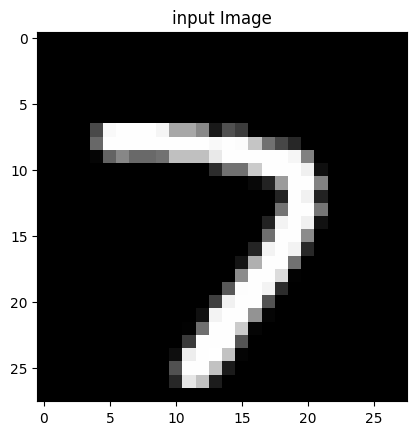

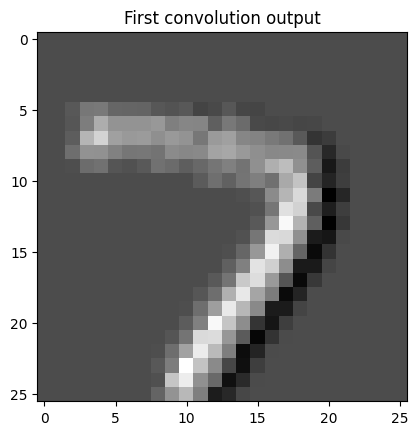

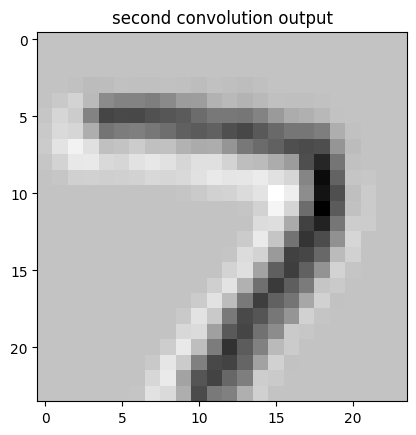

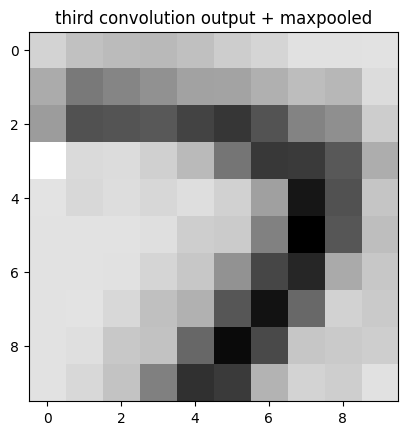

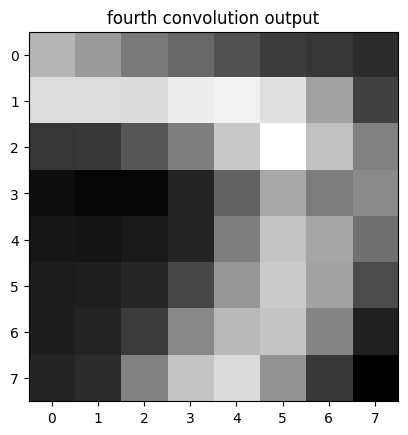

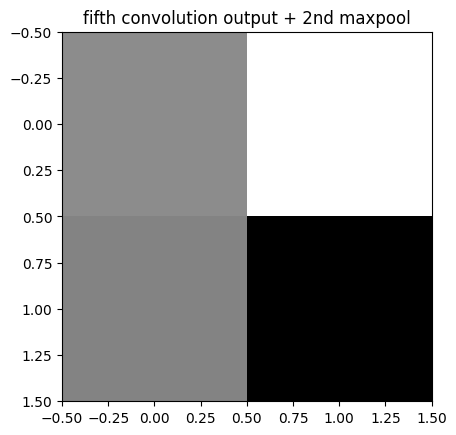

In [50]:
k=17

plt.imshow(x_test[k, :, :], cmap='gray')
plt.title("input Image")
plt.show()
plt.imshow(Zcn1[k, :, :, 4], cmap='gray')
plt.title("First convolution output")
plt.show()
plt.imshow(Zcn2[k, :, :, 4], cmap='gray')
plt.title("second convolution output")
plt.show()
plt.imshow(Zcn3[k, :, :, 4], cmap='gray')
plt.title("third convolution output + maxpooled")
plt.show()
plt.imshow(Zcn4[k, :, :, 4], cmap='gray')
plt.title("fourth convolution output")
plt.show()
plt.imshow(Zcn5[k, :, :, 4], cmap='gray')
plt.title("fifth convolution output + 2nd maxpool")
plt.show()

In [51]:
Y_ef, *_ = forward_prop(x_test, W1, b1, W2, b2, W3, b3,
                                Wcn1, Wcn2, Wcn3, Wcn4, Wcn5,
                                bcn1, bcn2, bcn3, bcn4, bcn5,
                                sc1, sc2, sc3, sc4, sc5,
                                sh1, sh2, sh3, sh4, sh5)

In [37]:
x_train.shape

(60000, 28, 28)

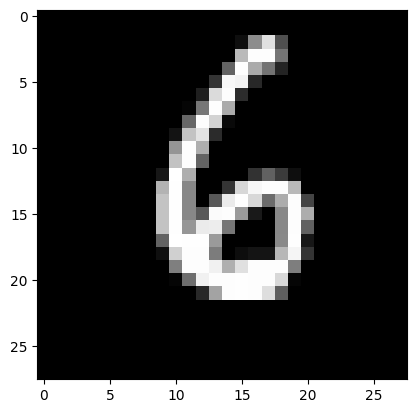

Predicted label: 6


In [149]:
k = np.random.randint(1, 100)
plt.imshow(x_tst[k], cmap="gray")
plt.show()
print("Predicted label:", np.argmax(Y_ef[:, k]))


Code in tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_cifar10_model():
    model = models.Sequential([
        layers.Conv2D(28, (3, 3), padding='same', kernel_initializer=tf.keras.initializers.HeNormal(), input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.ReLU(),
        
        layers.Conv2D(32, (3, 3), padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
        layers.BatchNormalization(),
        layers.ReLU(),
        
        layers.Conv2D(64, (3, 3), padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(128, (3, 3), padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dense(128, kernel_initializer=tf.keras.initializers.HeNormal()),
        layers.ReLU(),
        
        layers.Dense(10, kernel_initializer=tf.keras.initializers.HeNormal(), activation='softmax')
    ])
    
    return model



(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


x_train, x_test = x_train / 255.0, x_test / 255.0


model = build_cifar10_model()


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))


test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


#hardly 10 lines of code


The architecture I am using is definately overkill for mnist It is so because i Was targeting a different dataset >.<
You could easily get 90 % plus accuracy using a 8 to 15 k parameter model (I havent try it myself YET).

I hope everything is understandable